In [1]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(dplyr))
suppressMessages(library(viridis))
suppressMessages(library(cowplot))
suppressMessages(library(anndataR))
suppressMessages(library(ComplexHeatmap))
library(abind)

In [2]:
in_dir <- "../../results/05_fibroblast/20_cell_state_score"
out_dir <- "../../results/05_fibroblast/21_co_localization"

if(!dir.exists(out_dir)){
    dir.create(out_dir, recursive = TRUE)
}

In [3]:
sample_list <- c('HC01', 'HC02', 'HC03', 'HC05',
                 'SSc4994', 
                 'SSc5380', 
               'SSc-HL01', 'SSc-HL05', 'SSc-HL06', 'SSc-HL11',
               'SSc-HL13', 'SSc-HL25', 'SSc-HL33', 'SSc-HL35')

In [4]:
for(sample in sample_list){
    obj <- readRDS(glue::glue("{in_dir}/{sample}.rds"))
    
    df1 <- obj@meta.data %>%
            subset(select = c('B.cells', 'Endothelial', 'Keratinocytes', 'Melanocytes', 'Langerhans.cells', 'Macrophages', 
                              'Mast.cells', 'Monocytes', 'NK.cells', 'Neural', 'Pericytes',
                              'Plasma.cells', 'Smooth.Muscle', 'T.cells', 'cDC', 'pDC'))

    df2 <- obj@meta.data %>%
            subset(select = c('Fib1', 'Fib10', 'Fib2', 'Fib3', 'Fib4', 'Fib5', 'Fib6', 'Fib7', 'Fib8', 'Fib9'))
    
    df_cor <- as.data.frame(cor(df2, df1, method="spearman"))
    
    write.csv(df_cor, glue::glue("{out_dir}/{sample}.csv"))
}

In [5]:
df_cor <- lapply(sample_list, function(sample){
    df_cor = read.csv(glue::glue("{out_dir}/{sample}.csv"), row.names = 1)
    
    # read all samples
    df_cor <- df_cor %>%
        tibble::rownames_to_column(var = "fib") %>%
        tidyr::pivot_longer(cols = -fib, names_to = "cell_type", values_to = "correlation")
    
    df_cor$sample <- sample
    
    return(df_cor)
}) %>% do.call(rbind, .)

In [6]:
write.csv(df_cor, glue::glue("{out_dir}/all_cor.csv"))

In [7]:
df_cor_list <- lapply(sample_list, function(sample){
    df_cor = read.csv(glue::glue("{out_dir}/{sample}.csv"), row.names = 1)
    return(df_cor)
})

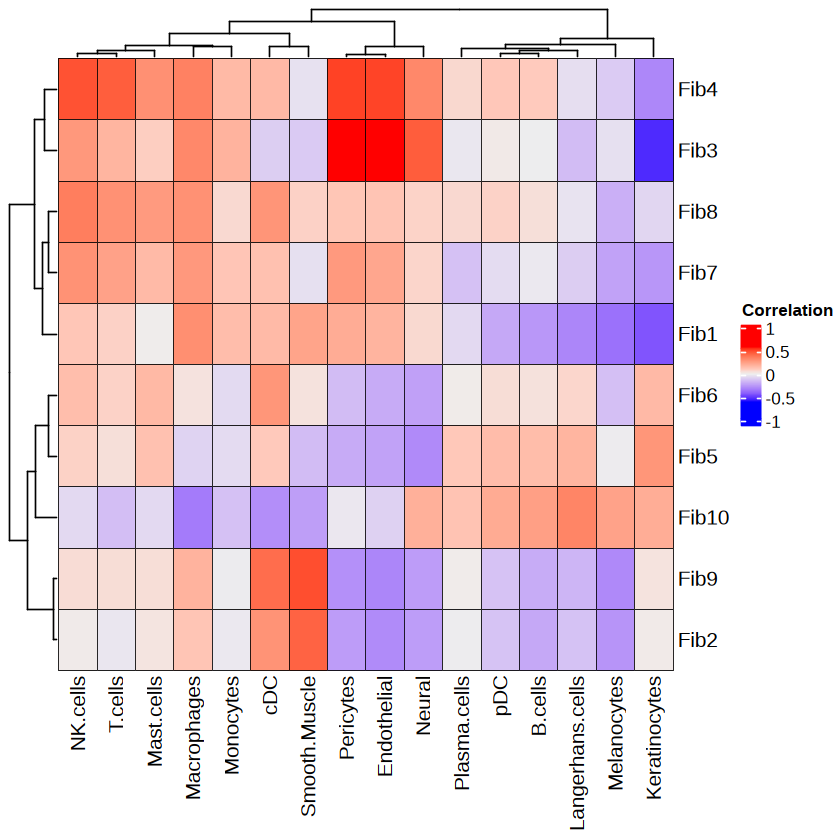

In [8]:
for(i in 1:length(df_cor_list)){
    
    mat <- df_cor_list[[i]]
    
    ht <- Heatmap(as.matrix(mat),
              name = 'Correlation',
              rect_gp = gpar(col = "black", lwd = 0.5),
              cluster_columns = TRUE,
              cluster_rows = TRUE,
              clustering_method_rows = 'ward.D2',
              clustering_method_columns = 'ward.D2')

    draw(ht)
}

In [9]:
array_3d <- abind(lapply(df_cor_list, function(df) as.matrix(df)), along = 3)
mean_matrix <- apply(array_3d, c(1, 2), mean)

In [10]:
mean_matrix

,B.cells,Endothelial,Keratinocytes,Melanocytes,Langerhans.cells,Macrophages,Mast.cells,Monocytes,NK.cells,Neural,Pericytes,Plasma.cells,Smooth.Muscle,T.cells,cDC,pDC
Fib1,-0.26468050,0.333789486,-0.50655309,-0.31441509,-0.30250465,0.42095049,0.23451747,0.077811784,0.25134747,0.21284728,0.3217719749,-0.108765934,0.30031243,0.29491487,0.28843455,-0.191960896
Fib10,0.24811352,-0.161961935,0.32755623,0.27643480,0.30448814,-0.27785308,-0.12210428,-0.061927141,-0.17230141,0.01563108,-0.1579892188,0.165668729,-0.23079270,-0.21521915,-0.22501916,0.191136314
Fib2,-0.08755635,-0.001594025,-0.10012653,-0.06194626,-0.04496401,0.12002370,0.08993192,-0.019497357,0.05119365,0.03130334,0.0139571399,0.019857885,0.15449714,0.05412448,0.12049248,-0.033104666
Fib3,-0.17969404,0.591360423,-0.56007358,-0.25898626,-0.26802777,0.47518315,0.27638997,0.131071915,0.35010027,0.31877831,0.5733709841,-0.066649019,0.26260012,0.39875120,0.31706865,-0.141816005
Fib4,-0.02423154,0.498273237,-0.32534409,-0.12005614,-0.11678226,0.37530001,0.30661605,0.143303136,0.38214084,0.25232571,0.4887449579,0.001170918,0.14707538,0.42725452,0.37957109,-0.005612194
Fib5,0.25180563,-0.153151115,0.31637123,0.22684662,0.29013995,-0.15572013,-0.07251584,-0.004667525,-0.08911231,-0.16725496,-0.1315143777,0.179005830,-0.30456084,-0.13159435,-0.07908642,0.194410998
Fib6,0.13265583,-0.032912767,0.14831483,0.14969697,0.14381773,0.05173127,0.15286318,0.028281314,0.10522668,-0.02213116,0.0002375723,0.070140170,-0.11340889,0.09719121,0.20196389,0.141361623
Fib7,0.07334699,0.186942281,-0.02879613,0.05600294,0.04948636,0.17973900,0.14652943,0.044844752,0.16809817,0.06528472,0.1892682271,0.030962113,-0.03961181,0.18650225,0.18037231,0.057587612
Fib8,-0.08951445,0.249261955,-0.25083894,-0.12650086,-0.12909385,0.38298192,0.33108938,0.089712423,0.30816163,0.16785646,0.2542705477,-0.042458752,0.13306930,0.33866331,0.36691492,-0.035933242
Fib9,-0.19088699,0.087750645,-0.23455682,-0.16935059,-0.18259663,0.24645885,0.15089159,0.019990078,0.15177867,0.06930866,0.0933540159,-0.029954290,0.24972653,0.15532081,0.23569906,-0.116795484


In [11]:
options(repr.plot.height = 5, repr.plot.width = 6)

ht <- Heatmap(as.matrix(mean_matrix),
              name = 'Correlation',
              rect_gp = gpar(col = "black", lwd = 0.5),
              cluster_columns = TRUE,
              cluster_rows = TRUE,
              clustering_method_rows = 'ward.D2',
              clustering_method_columns = 'ward.D2')

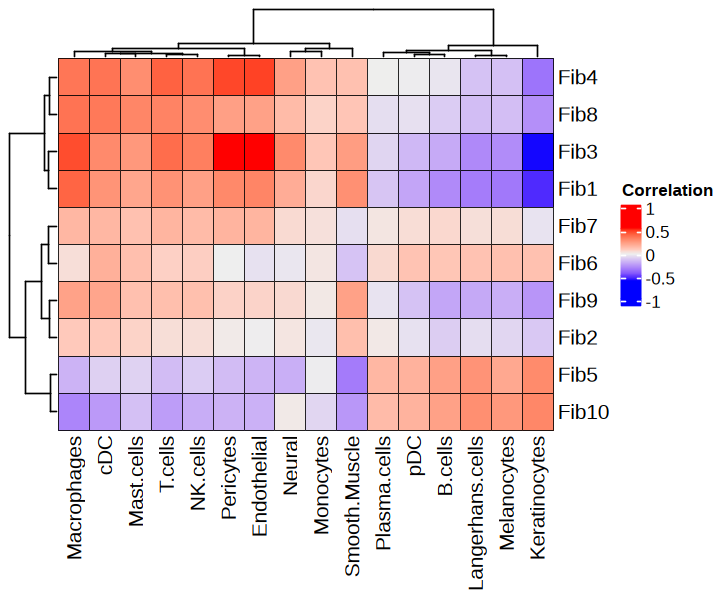

In [12]:
draw(ht)

In [ ]:
write.csv(mean_matrix, glue::glue("{out_dir}/co_localization.csv"))